In [136]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(20)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [137]:
#Reading The Data File
PATH_TO_DATA = 'perceptron.csv'
df = pd.read_csv(PATH_TO_DATA)
#a = Data.to_numpy()
Data=df.values

In [138]:
##first 300datas for training
# len(Data[1,:])
# Training_Data=Data[0:300,:]
# Test_Data=Data[300:400,:]
# x1_train = Training_Data[:,0]
# x2_train = Training_Data[:,1]
# z_train = Training_Data[:,2]

In [139]:
X=Data[:,:2]
y=Data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
x1_train = X_train[:,0]
x2_train = X_train[:,1]
z_train = y_train

# Training Datas


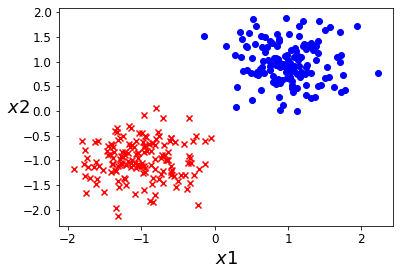

In [140]:
for i in range(len(z_train)):
    if z_train[i]==1:
        plt.scatter(x1_train[i], x2_train[i],color='r',marker='x')
    else: 
        plt.scatter(x1_train[i], x2_train[i],color='b',marker='o')
    plt.xlabel("$x1$", fontsize=18)
    plt.ylabel("$x2$", rotation=0, fontsize=18)
    
plt.show()

# Gaining weights


In [141]:
threshold=0.2 #change
Alpha=0.1 #change
#Initialization
b=0 #changed
flag=1
w1=0
w2=0
epoch=0
h=np.zeros(len(z_train))
while(flag==1):
    #epoch=epoch+1
    print(epoch)
    for j in range(len(z_train)):
        net=w1*x1_train[j]+w2*x2_train[j]+b
        if abs(net)<= threshold :
            h[j] =0
        elif (net > threshold ):  
            h[j] =1
        elif (net < threshold) :  
            h[j] = -1
        #Updating rules            
        if (h[j]-z_train[j]!=0):
            w1=w1+Alpha*z_train[j]*x1_train[j]
            w2=w2+Alpha*z_train[j]*x2_train[j]      
            b=b+Alpha*z_train[j]
            
        comparison = h == z_train
        equal_arrays = comparison.all()
        #print(equal_arrays)
        if (equal_arrays):
            print(epoch,j)
            flag=0
            break
    epoch=epoch+1       
w1,w2,b,epoch,j

0
1
2
3
4
5
6
6 130


(-0.6011461323983168, -0.5476183974314414, 0.0, 7, 130)

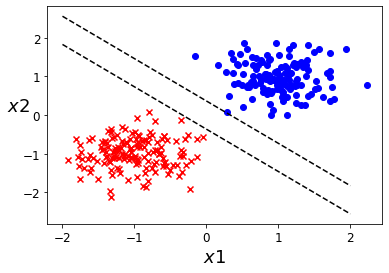

In [142]:
xx=np.linspace(-2,2)
yy1=-(w1/w2) * xx-((b+threshold)/w2)
yy2=-(w1/w2) * xx-((b-threshold)/w2)
plt.plot(xx, yy1, "k--")
plt.plot(xx, yy2, "k--")
for i in range(len(z_train)):
    if z_train[i]==1:
        plt.scatter(x1_train[i], x2_train[i],color='r',marker='x')
    else: 
        plt.scatter(x1_train[i], x2_train[i],color='b',marker='o')
    plt.xlabel("$x1$", fontsize=18)
    plt.ylabel("$x2$", rotation=0, fontsize=18)
plt.show()


# Test Data


In [143]:
x1_test = X_test[:,0]
x2_test = X_test[:,1]
z_test= y_test
# x1_test= Test_Data[:,0]
# x2_test= Test_Data[:,1]
# z_test = Test_Data[:,2]

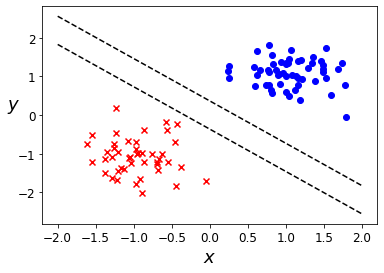

In [144]:
xx=np.linspace(-2,2)
yy1=-(w1/w2) * xx-((b+threshold)/w2)
yy2=-(w1/w2) * xx-((b-threshold)/w2)
plt.plot(xx, yy1, "k--")
plt.plot(xx, yy2, "k--")
for i in range(len(z_test)):
    if z_test[i]==1:
        plt.scatter(x1_test[i], x2_test[i],color='r',marker='x')
    else: 
        plt.scatter(x1_test[i], x2_test[i],color='b',marker='o')
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    #plt.grid()
    
plt.show()